
# Animate Trajectory

Animates a trajectory.


In [1]:
%matplotlib widget

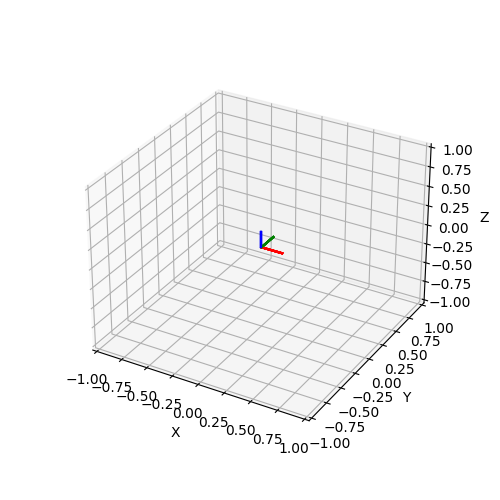

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from pytransform3d.plot_utils import Trajectory
from pytransform3d.rotations import passive_matrix_from_angle, R_id
from pytransform3d.transformations import transform_from, concat


def update_trajectory(step, n_frames, trajectory):
    progress = float(step + 1) / float(n_frames)
    H = np.zeros((100, 4, 4))
    H0 = transform_from(R_id, np.zeros(3))
    H_mod = np.eye(4)
    for i, t in enumerate(np.linspace(0, progress, len(H))):
        H0[:3, 3] = np.array([t, 0, t])
        H_mod[:3, :3] = passive_matrix_from_angle(2, 8 * np.pi * t)
        H[i] = concat(H0, H_mod)

    trajectory.set_data(H)
    return trajectory



n_frames = 200

fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(111, projection="3d")
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

H = np.zeros((100, 4, 4))
H[:] = np.eye(4)
trajectory = Trajectory(H, show_direction=False, s=0.2, c="k")
trajectory.add_trajectory(ax)

anim = animation.FuncAnimation(
    fig, update_trajectory, n_frames, fargs=(n_frames, trajectory),
    interval=50, blit=False)

plt.show()

In [3]:
from IPython.display import HTML
 
# Display the animation in the jupyter notebook   
## Display the animation using jshtml
# HTML(anim.to_jshtml())

# Alternative option: If you don’t need the interactive controls, you can use HTML(ani.to_html5_video()) to embed the animation as an HTML5 video, which might load faster.
HTML(anim.to_html5_video())